# **Daidzin**

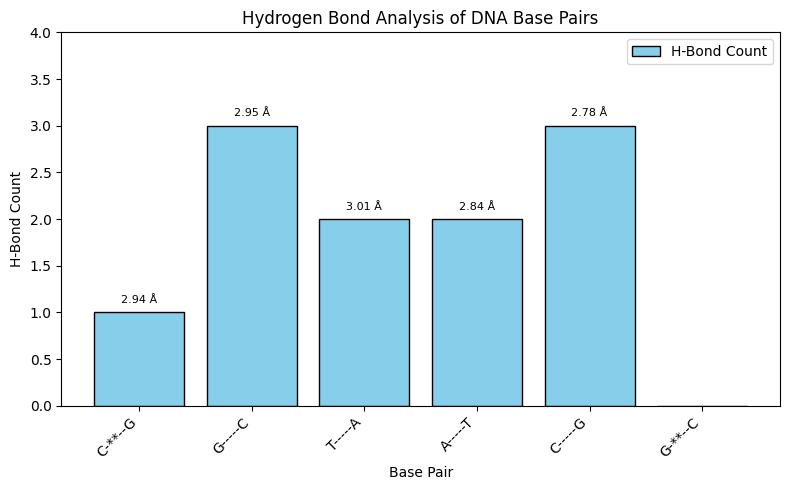

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv("hbond_data.csv")

# Base pair indices
x = range(1, len(data) + 1)

# Plot the number of H-bonds
plt.figure(figsize=(8, 5))
plt.bar(x, data["H-Bond Count"], color="skyblue", edgecolor="black", label="H-Bond Count")
plt.xticks(x, data["Base Pair"], rotation=45, ha="right")
plt.xlabel("Base Pair")
plt.ylabel("H-Bond Count")
plt.title("Hydrogen Bond Analysis of DNA Base Pairs")
plt.ylim(0, 4)
plt.legend()
plt.tight_layout()

# Annotate with shortest H-bond lengths
for i, length in enumerate(data["Shortest H-Bond Length (Å)"]):
    if pd.notna(length):  # Only annotate if length is available
        plt.text(x[i], data["H-Bond Count"][i] + 0.1, f"{length:.2f} Å", ha="center", fontsize=8)

plt.show()


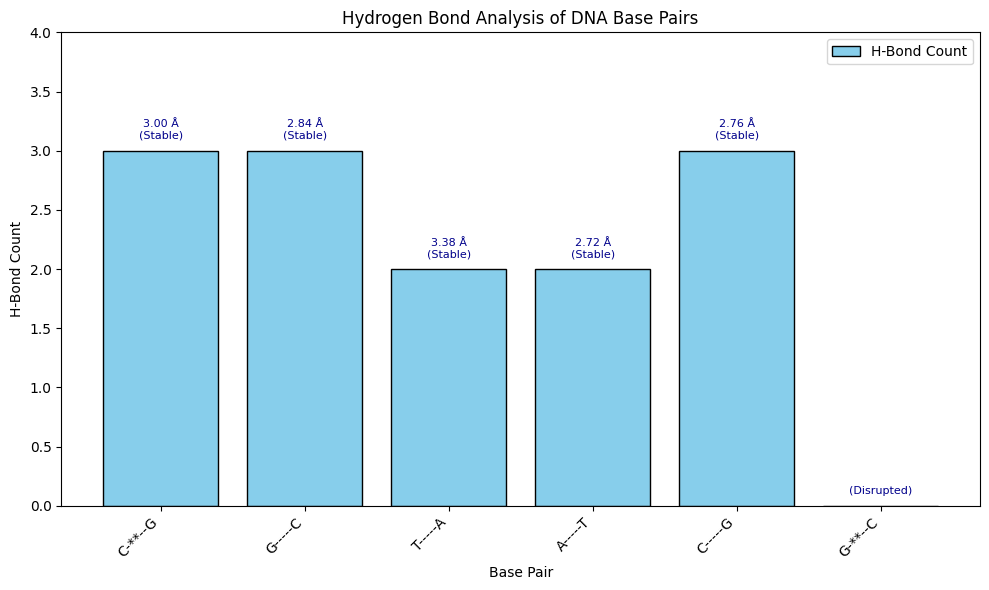

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data preparation
data = pd.DataFrame({
    "Base Pair": ["C-**--G", "G-----C", "T-----A", "A-----T", "C-----G", "G-**--C"],
    "H-Bond Count": [3, 3, 2, 2, 3, 0],
    "Shortest H-Bond Length (Å)": [3.00--2.99--2.96, 2.84--2.88--2.69, 3.38--2.91--, 2.72, 2.76, None],
    "Notes": ["Stable", "Stable", "Stable", "Stable", "Stable", "Disrupted"]
})

# Base pair indices
x = range(1, len(data) + 1)

# Plot the number of H-bonds
plt.figure(figsize=(10, 6))
bars = plt.bar(x, data["H-Bond Count"], color="skyblue", edgecolor="black", label="H-Bond Count")
plt.xticks(x, data["Base Pair"], rotation=45, ha="right")
plt.xlabel("Base Pair")
plt.ylabel("H-Bond Count")
plt.title("Hydrogen Bond Analysis of DNA Base Pairs")
plt.ylim(0, 4)
plt.legend()

# Annotate with shortest H-bond lengths and notes
for i, (length, note) in enumerate(zip(data["Shortest H-Bond Length (Å)"], data["Notes"])):
    y_pos = data["H-Bond Count"][i]
    if pd.notna(length):  # Only annotate if length is available
        plt.text(x[i], y_pos + 0.1, f"{length:.2f} Å\n({note})", ha="center", fontsize=8, color="darkblue")
    else:  # For cases with no H-bond length
        plt.text(x[i], y_pos + 0.1, f"({note})", ha="center", fontsize=8, color="darkblue")

plt.tight_layout()

# Save the plot as a PNG file with 300 dpi
plt.savefig("Hbond_Analysis_DNA.png", dpi=300)
plt.show()


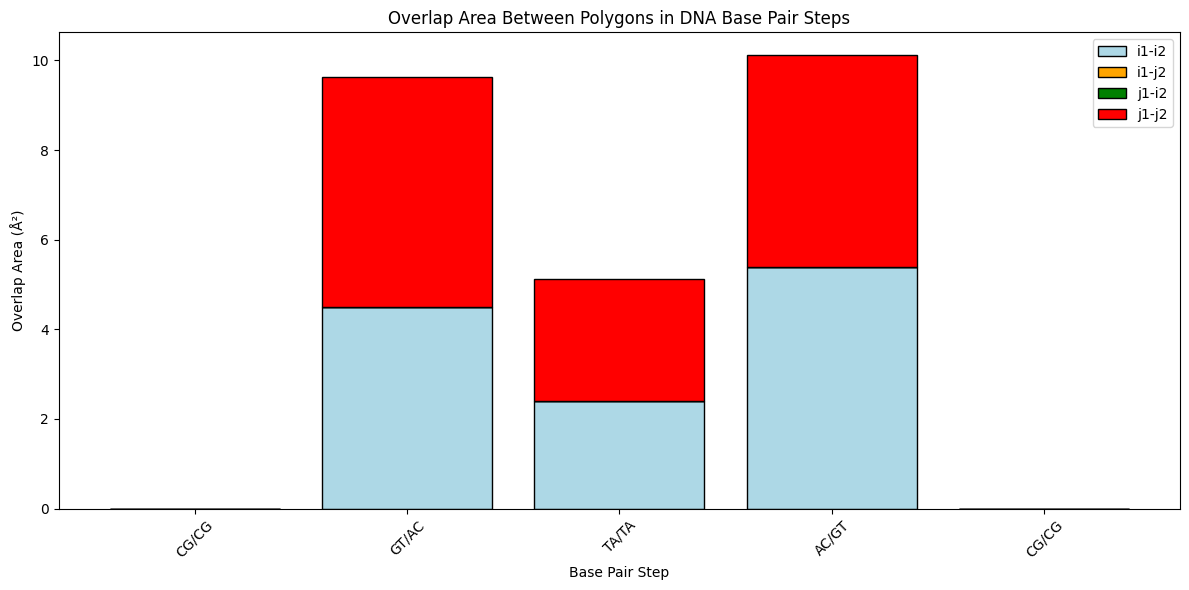

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = pd.DataFrame({
    "Step": ["CG/CG", "GT/AC", "TA/TA", "AC/GT", "CG/CG"],
    "i1-i2": [0.00, 4.50, 2.41, 5.38, 0.00],
    "i1-j2": [0.00, 0.00, 0.00, 0.00, 0.00],
    "j1-i2": [0.00, 0.00, 0.00, 0.00, 0.00],
    "j1-j2": [0.00, 5.14, 2.72, 4.74, 0.00],
    "Sum": [0.00, 9.64, 5.14, 10.12, 0.00],
    "Ring Only Sum": [0.00, 3.24, 0.17, 4.42, 0.00]
})

# Base pair step indices
x = range(len(data))

# Stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, data["i1-i2"], label="i1-i2", color="lightblue", edgecolor="black")
plt.bar(x, data["i1-j2"], bottom=data["i1-i2"], label="i1-j2", color="orange", edgecolor="black")
plt.bar(x, data["j1-i2"], bottom=data["i1-i2"] + data["i1-j2"], label="j1-i2", color="green", edgecolor="black")
plt.bar(x, data["j1-j2"], bottom=data["i1-i2"] + data["i1-j2"] + data["j1-i2"], label="j1-j2", color="red", edgecolor="black")

# Labels and customization
plt.xticks(x, data["Step"], rotation=45)
plt.xlabel("Base Pair Step")
plt.ylabel("Overlap Area (Å²)")
plt.title("Overlap Area Between Polygons in DNA Base Pair Steps")
plt.legend()

# Save the plot as PNG (300 dpi)
plt.tight_layout()
plt.savefig("DNA_Polygon_Overlap.png", dpi=300)
plt.show()


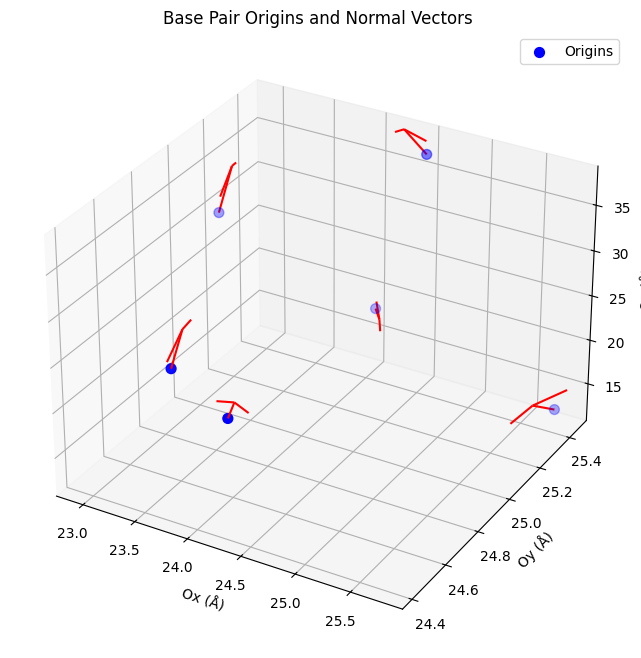

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Data preparation
data = pd.DataFrame({
    "Base Pair": ["C-G", "G-C", "T-A", "A-T", "C-G", "G-C"],
    "Ox": [25.759, 24.207, 24.273, 23.721, 22.946, 24.520],
    "Oy": [25.441, 25.324, 24.419, 24.438, 25.160, 25.427],
    "Oz": [12.558, 20.754, 23.746, 26.847, 30.066, 37.414],
    "Nx": [-0.033, 0.130, 0.033, -0.047, -0.089, -0.112],
    "Ny": [-0.052, -0.073, -0.001, 0.059, 0.092, 0.003],
    "Nz": [0.998, 0.989, 0.999, 0.997, 0.992, 0.994]
})

# 3D plot setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot origins as scatter points
ax.scatter(data["Ox"], data["Oy"], data["Oz"], c='blue', label="Origins", s=50)

# Plot normal vectors as arrows
for i in range(len(data)):
    ax.quiver(
        data["Ox"][i], data["Oy"][i], data["Oz"][i],
        data["Nx"][i], data["Ny"][i], data["Nz"][i],
        color='red', length=2, normalize=True
    )

# Labels and legend
ax.set_xlabel("Ox (Å)")
ax.set_ylabel("Oy (Å)")
ax.set_zlabel("Oz (Å)")
ax.set_title("Base Pair Origins and Normal Vectors")
ax.legend()

# Save the plot as PNG (300 dpi)
plt.savefig("BasePair_3D_Plot.png", dpi=300)
plt.show()


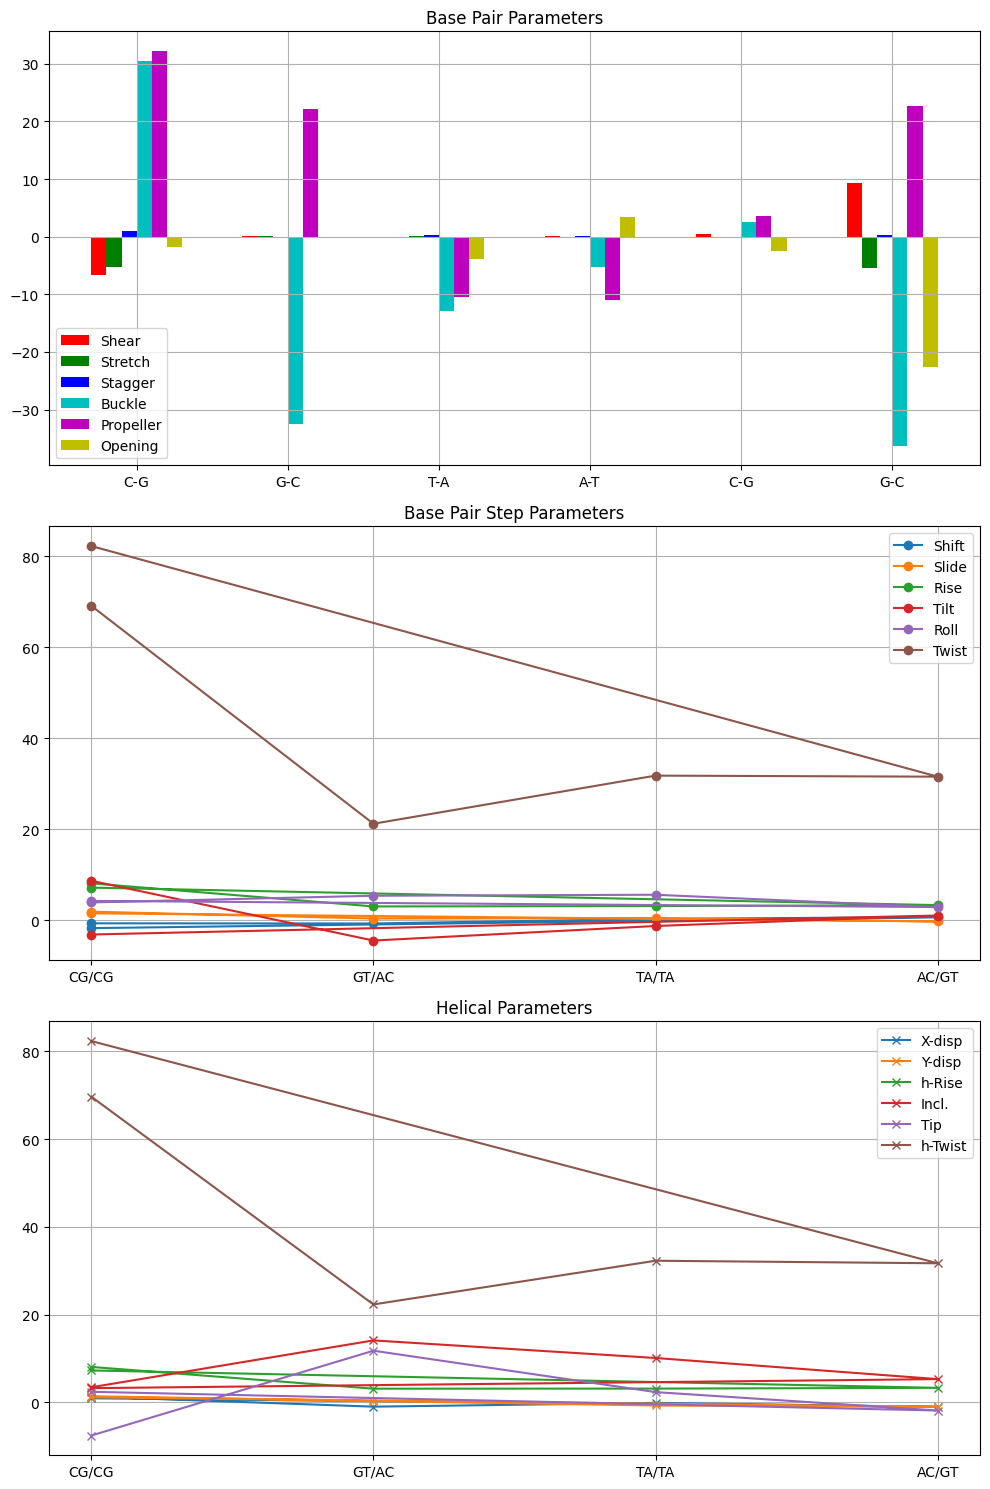

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
base_pair_params = {
    "Base Pair": ["C-G", "G-C", "T-A", "A-T", "C-G", "G-C"],
    "Shear": [-6.69, 0.16, -0.26, 0.12, 0.46, 9.38],
    "Stretch": [-5.33, 0.16, 0.19, -0.10, -0.13, -5.52],
    "Stagger": [1.03, -0.27, 0.29, 0.15, -0.02, 0.37],
    "Buckle": [30.39, -32.44, -12.88, -5.30, 2.63, -36.24],
    "Propeller": [32.20, 22.10, -10.41, -11.00, 3.59, 22.68],
    "Opening": [-1.88, -0.22, -3.93, 3.35, -2.55, -22.64],
}

base_pair_step_params = {
    "Step": ["CG/CG", "GT/AC", "TA/TA", "AC/GT", "CG/CG"],
    "Shift": [-0.69, -0.73, 0.29, 0.67, -1.75],
    "Slide": [1.87, 0.36, 0.45, -0.28, 1.51],
    "Rise": [8.10, 3.02, 3.10, 3.31, 7.16],
    "Tilt": [8.66, -4.48, -1.28, 1.02, -3.15],
    "Roll": [3.90, 5.37, 5.59, 2.88, 4.24],
    "Twist": [69.12, 21.20, 31.78, 31.55, 82.25],
}

helical_params = {
    "Step": ["CG/CG", "GT/AC", "TA/TA", "AC/GT", "CG/CG"],
    "X-disp": [1.28, -1.00, -0.14, -1.04, 0.91],
    "Y-disp": [1.38, 0.28, -0.73, -1.04, 1.15],
    "h-Rise": [8.06, 3.10, 3.12, 3.29, 7.26],
    "Incl.": [3.42, 14.11, 10.10, 5.28, 3.22],
    "Tip": [-7.59, 11.76, 2.32, -1.88, 2.39],
    "h-Twist": [69.69, 22.31, 32.28, 31.70, 82.38],
}

# Plotting Base-Pair Parameters
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
params = ["Shear", "Stretch", "Stagger", "Buckle", "Propeller", "Opening"]
colors = ["r", "g", "b", "c", "m", "y"]
x = np.arange(len(base_pair_params["Base Pair"]))

for i, param in enumerate(params):
    axs[0].bar(x + i * 0.1, base_pair_params[param], width=0.1, label=param, color=colors[i])
axs[0].set_title("Base Pair Parameters")
axs[0].set_xticks(x + 0.25)
axs[0].set_xticklabels(base_pair_params["Base Pair"])
axs[0].legend()
axs[0].grid(True)

# Plotting Base-Pair Step Parameters
params_step = ["Shift", "Slide", "Rise", "Tilt", "Roll", "Twist"]
for param in params_step:
    axs[1].plot(base_pair_step_params["Step"], base_pair_step_params[param], label=param, marker="o")
axs[1].set_title("Base Pair Step Parameters")
axs[1].legend()
axs[1].grid(True)

# Plotting Helical Parameters
params_helical = ["X-disp", "Y-disp", "h-Rise", "Incl.", "Tip", "h-Twist"]
for param in params_helical:
    axs[2].plot(helical_params["Step"], helical_params[param], label=param, marker="x")
axs[2].set_title("Helical Parameters")
axs[2].legend()
axs[2].grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("DNA_parameters_visualization.png", dpi=300)
plt.show()


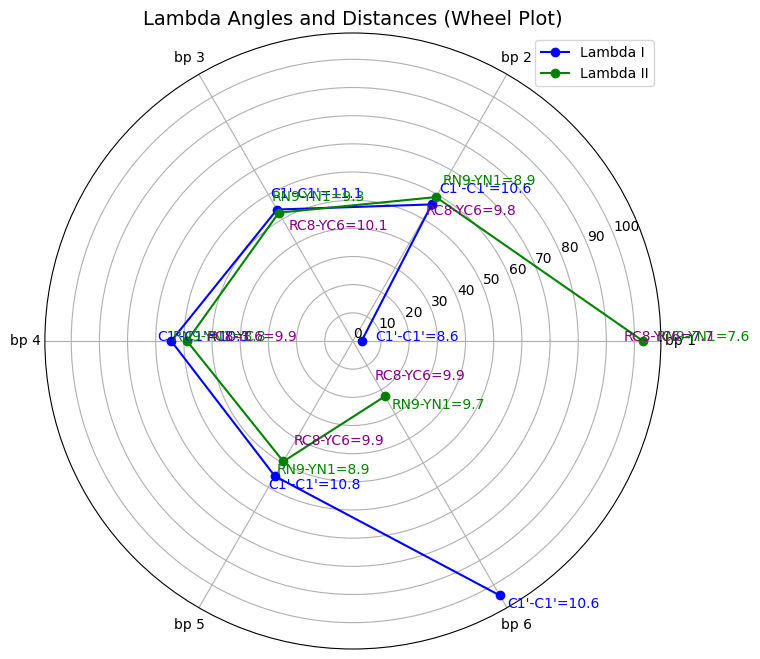

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Lambda angles and distances
base_pairs = [1, 2, 3, 4, 5, 6]
lambda_I = [3.1, 56.0, 53.9, 64.5, 55.4, 104.3]
lambda_II = [103.0, 59.0, 52.6, 58.9, 49.4, 22.7]
C1_C1 = [8.6, 10.6, 11.1, 10.3, 10.8, 10.6]
RN9_YN1 = [7.6, 8.9, 9.3, 8.8, 8.9, 9.7]
RC8_YC6 = [7.7, 9.8, 10.1, 9.9, 9.9, 9.9]

# Set up a wheel plot (polar plot)
theta = np.linspace(0, 2 * np.pi, len(base_pairs), endpoint=False)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Plot Lambda Angles on the wheel plot
ax.plot(theta, lambda_I, label='Lambda I', color='blue', marker='o')
ax.plot(theta, lambda_II, label='Lambda II', color='green', marker='o')

# Plot distance annotations for each base pair
for i in range(len(base_pairs)):
    ax.text(theta[i], lambda_I[i] + 5, f'C1\'-C1\'={C1_C1[i]}', color='blue', fontsize=10)
    ax.text(theta[i], lambda_II[i] + 5, f'RN9-YN1={RN9_YN1[i]}', color='green', fontsize=10)
    ax.text(theta[i], lambda_II[i] - 7, f'RC8-YC6={RC8_YC6[i]}', color='purple', fontsize=10)

# Customize the plot
ax.set_title("Lambda Angles and Distances (Wheel Plot)", fontsize=14)
ax.set_xticks(theta)
ax.set_xticklabels([f"bp {i+1}" for i in range(len(base_pairs))])
ax.set_yticks(np.arange(0, 110, 10))
ax.legend()

# Save the plot as PNG (300 dpi)
plt.savefig('lambda_angles_wheel_plot.png', dpi=300)
plt.show()


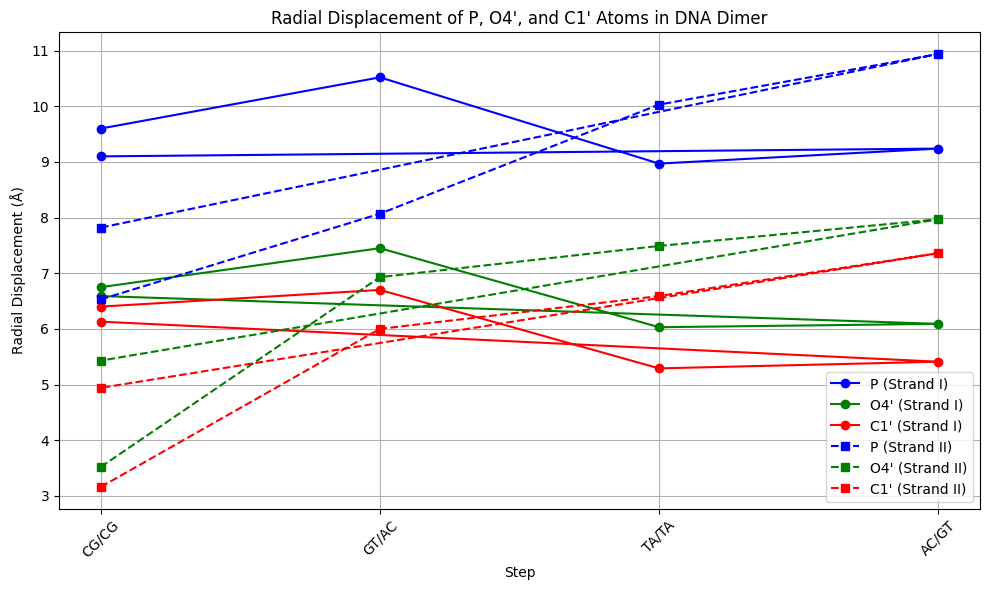

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step numbers (1 to 5)
steps = ['CG/CG', 'GT/AC', 'TA/TA', 'AC/GT', 'CG/CG']

# Radial displacement data for P, O4', C1' atoms
# Format: [P_strand1, O4'_strand1, C1'_strand1, P_strand2, O4'_strand2, C1'_strand2]
displacements = np.array([
    [9.60, 6.75, 6.40, 6.53, 3.52, 3.16],  # Step 1: CG/CG
    [10.52, 7.45, 6.70, 8.07, 6.93, 6.00],  # Step 2: GT/AC
    [8.97, 6.03, 5.29, 10.03, 7.49, 6.59],  # Step 3: TA/TA
    [9.24, 6.09, 5.41, 10.94, 7.97, 7.36],  # Step 4: AC/GT
    [9.10, 6.59, 6.13, 7.82, 5.43, 4.94]   # Step 5: CG/CG
])

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.plot(steps, displacements[:, 0], label="P (Strand I)", marker='o', color='blue')
ax.plot(steps, displacements[:, 1], label="O4' (Strand I)", marker='o', color='green')
ax.plot(steps, displacements[:, 2], label="C1' (Strand I)", marker='o', color='red')

ax.plot(steps, displacements[:, 3], label="P (Strand II)", marker='s', color='blue', linestyle='--')
ax.plot(steps, displacements[:, 4], label="O4' (Strand II)", marker='s', color='green', linestyle='--')
ax.plot(steps, displacements[:, 5], label="C1' (Strand II)", marker='s', color='red', linestyle='--')

# Set labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Radial Displacement (Å)')
ax.set_title('Radial Displacement of P, O4\', and C1\' Atoms in DNA Dimer')

# Add legend
ax.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


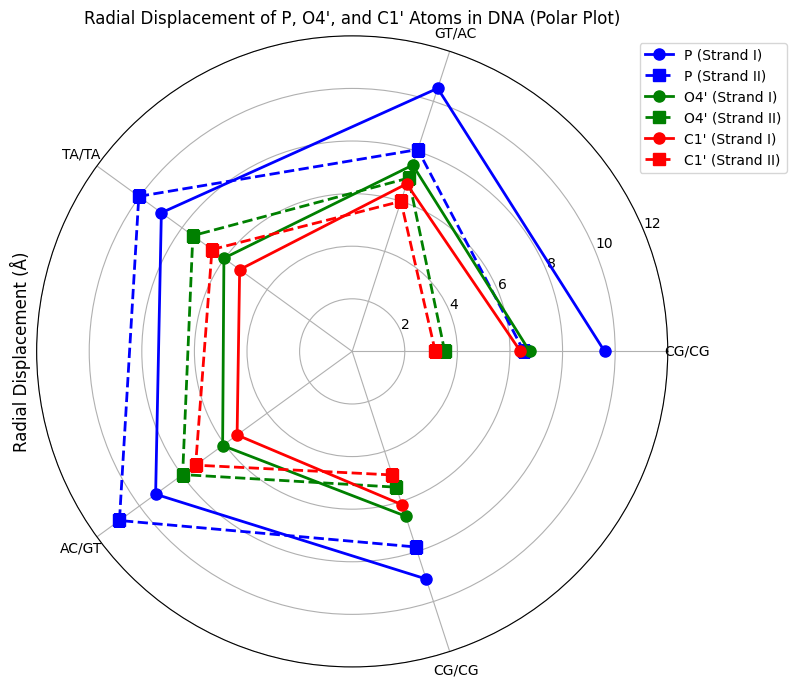

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step numbers (1 to 5)
steps = ['CG/CG', 'GT/AC', 'TA/TA', 'AC/GT', 'CG/CG']

# Radial displacement data for P, O4', C1' atoms (Strand I and II)
displacements = np.array([
    [9.60, 6.75, 6.40, 6.53, 3.52, 3.16],  # Step 1: CG/CG
    [10.52, 7.45, 6.70, 8.07, 6.93, 6.00],  # Step 2: GT/AC
    [8.97, 6.03, 5.29, 10.03, 7.49, 6.59],  # Step 3: TA/TA
    [9.24, 6.09, 5.41, 10.94, 7.97, 7.36],  # Step 4: AC/GT
    [9.10, 6.59, 6.13, 7.82, 5.43, 4.94]   # Step 5: CG/CG
])

# Convert the displacement data to polar coordinates
# Number of data points (steps)
num_steps = len(steps)

# Create a figure and a polar axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Define colors and labels for each of the three atoms
colors = ['blue', 'green', 'red']
labels = ['P', 'O4\'', 'C1\'']

# Plot the data for Strand I and Strand II in polar coordinates
for i, (color, label) in enumerate(zip(colors, labels)):
    # Create a set of angles for each of the steps (equally spaced)
    angles = np.linspace(0, 2 * np.pi, num_steps, endpoint=False)

    # Radial displacement for the i-th atom (for both strands)
    strand_1_data = displacements[:, i]
    strand_2_data = displacements[:, i + 3]  # Offset by 3 for Strand II

    # Plotting for Strand I
    ax.plot(angles, strand_1_data, label=f"{label} (Strand I)", marker='o', color=color, linestyle='-', linewidth=2, markersize=8)

    # Plotting for Strand II
    ax.plot(angles, strand_2_data, label=f"{label} (Strand II)", marker='s', color=color, linestyle='--', linewidth=2, markersize=8)

# Set the labels for the steps
ax.set_xticks(angles)
ax.set_xticklabels(steps, rotation=45)

# Set radial limits
ax.set_ylim(0, 12)  # Based on the max displacement in the data

# Add title and labels
ax.set_title('Radial Displacement of P, O4\', and C1\' Atoms in DNA (Polar Plot)', va='bottom')
ax.set_ylabel('Radial Displacement (Å)', fontsize=12)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Display the plot
plt.tight_layout()
plt.savefig('Radial Displacement_Daid.png', dpi=300)
plt.show()

